<a href="https://colab.research.google.com/github/sadikinisaac/general2/blob/master/cnn_classifyimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program classifies images

In [0]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
#Get the shape of x_train
print('x_train shape:', x_train.shape) #4D array 50,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_train shape:', y_train.shape) #2D array 50,000 rows and 1 column
#Get the shape of x_train
print('x_test shape:', x_test.shape) #4D array 10,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_test shape:', y_test.shape) #2D array 10,000 rows and 1 column

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
#Take a look at the first image (at index=0) in the training data set as a numpy array
#This shows the image as a series of pixel values
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

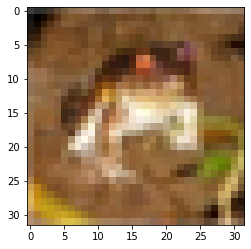

In [0]:
#Show the image as an image instead of a series of pixel values using matplotlib
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [0]:
#Print the label of the image, NOTE: the number 6 = frog
#0 = airplane
#1 = automobile
#2 = bird
#3 = cat
#4 = deer
#5 = dog
#6 = frog
#7 = horse
#8 = ship
#9 = truck
print('The label is:', y_train[0])

The label is: [6]


In [0]:
#One-Hot Encoding 
#Convert the labels into a set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [0]:
#Print all of the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
#Print an example of the new labels, NOTE: The label 6 = [0,0,0,0,0,0,1,0,0,0]
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#normalize the pixels in the images to be a value between 0 and 1 , they are normally values between 0 and 255
#doing this will help the neural network.
x_train = x_train / 255
x_test = x_test / 255

In [0]:
#Build The CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential() #Create the architecture

#Convolution layer to extract features from the input image, and create 32 ReLu
#5x5 convolved features/layers aka feature map.
#Note:You must input the input shape only in this first layer.
# number of output channels or convolution filters = 32
# number of rows in the convolution kernel
# number of cols in the convolution kernel
# input shape 32x32 RGB image, so spacially it's 3-Dimensional
# activation function Rectifier Linear Unit aka (ReLu)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3))) 


#Pooling layer with a 2x2 filter to get the max element from the convolved features , 
#this reduces the dimensionality by half e.g. 16x16, aka sub sampling
#Note: the default for stride is the pool_size
model.add(MaxPooling2D(pool_size=(2, 2)))



#2nd Convolution layer with 64 channels
model.add(Conv2D(64, (5, 5), activation='relu'))

#Adding second Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattening, Flattens the input. Does not affect the batch size. 
#(Flattening occurs when you reduce all layers to one background layer), 
#this makes the image a linear array or 1D Array or 1D Vector to 
#feed into or connect with the neural network
model.add(Flatten())
model.add(Dense(1000, activation='relu')) # a layer with 1000 neurons and activation function ReLu
model.add(Dense(10, activation='softmax')) #a layer with 10 output neurons for each label using softmax activation function

In [0]:
model.compile(loss='categorical_crossentropy', # loss function used for classes that are greater than 2)
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
#Batch: Total number of training examples present in a single batch
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and 
#      backward through the neural network only ONCE.
#Fit: Another word for train

#NOTE: do not need to use validation_data, so did not have to split the data 
#into a validation sets.  just put in 0.2 and this splits the data 20% .
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.3 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 75s 2ms/step - loss: 1.6878 - acc: 0.3876 - val_loss: 1.4462 - val_acc: 0.4826
Epoch 2/10
35000/35000 [==============================] - 74s 2ms/step - loss: 1.3150 - acc: 0.5329 - val_loss: 1.2588 - val_acc: 0.5553
Epoch 3/10
35000/35000 [==============================] - 75s 2ms/step - loss: 1.1400 - acc: 0.5998 - val_loss: 1.1145 - val_acc: 0.6125
Epoch 4/10
35000/35000 [==============================] - 74s 2ms/step - loss: 1.0219 - acc: 0.6433 - val_loss: 1.0627 - val_acc: 0.6309
Epoch 5/10
35000/35000 [==============================] - 75s 2ms/step - loss: 0.9386 - acc: 0.6725 - val_loss: 0.9835 - val_acc: 0.6594
Epoch 6/10
35000/35000 [==============================] - 74s 2ms/step - loss: 0.8618 - acc: 0.7003 - val_loss: 0.9581 - val_acc: 0.6683
Epoch 7/10
35000/35000 [==

In [0]:
#Get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]
#test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 599us/step


0.6928

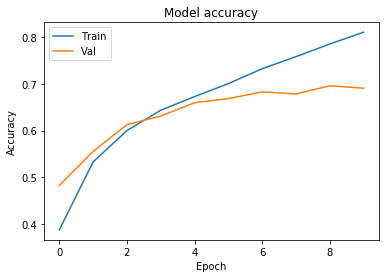

In [0]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

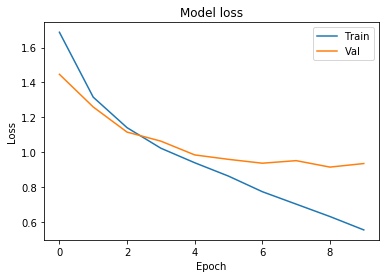

In [0]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab


Saving cat.4014.jpg to cat.4014.jpg


In [0]:
my_image = plt.imread("cat.4014.jpg") #Read in the image (3, 14, 20)

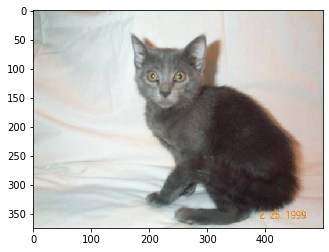

In [0]:
#Show the uploaded image
img = plt.imshow(my_image)

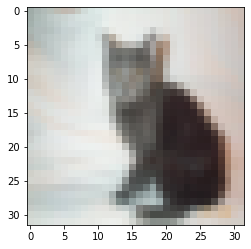

In [0]:
#Resize & Show the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3)) #resize the image to 32x32 pixel with depth = 3
img = plt.imshow(my_image_resized) #show new image

In [0]:
#Get the probabilities for each class
#model.predict function is expecting an array, so  will use np.array to make this transformation on the image
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [0]:
#Show the probability for each class
probabilities

array([[4.7569661e-04, 7.0679662e-06, 5.2324183e-02, 9.0644681e-01,
        1.6240749e-03, 1.2624032e-02, 2.4087334e-03, 2.1827327e-02,
        2.1134843e-03, 1.4859594e-04]], dtype=float32)

In [0]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.9064468
Second most likely class: bird -- Probability: 0.052324183
Third most likely class: horse -- Probability: 0.021827327
Fourth most likely class: dog -- Probability: 0.012624032
Fifth most likely class: frog -- Probability: 0.0024087334


In [0]:
#To save this model 
model.save('my_model.h5')

In [0]:
#To load this model
from keras.models import load_model
model = load_model('my_model.h5')